In [121]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [4]:
def read_and_concat_csv(filepath, quantity):
    temp_df_A = pd.DataFrame()
    for x in range(quantity):
        temp_df_B = pd.read_csv(f'{filepath}{x+1}.csv')
        temp_df_A = pd.concat([temp_df_A, temp_df_B])
    return temp_df_A

In [5]:
daily_2018_standard = pd.DataFrame()

In [6]:
daily_2018_standard = read_and_concat_csv('../data/batters_2018_daily/batters_2018_daily_standard', 6)

In [7]:
daily_2018_advanced = read_and_concat_csv('../data/batters_2018_daily/batters_2018_daily_advanced', 6)

In [8]:
daily_2018_battedballs = read_and_concat_csv('../data/batters_2018_daily/batters_2018_daily_battedballs', 6)

In [9]:
daily_2018_standard.shape

(51842, 24)

In [10]:
daily_2018_advanced.shape

(51842, 18)

In [11]:
daily_2018_battedballs.shape

(51842, 19)

In [12]:
daily_2018 = daily_2018_standard.merge(daily_2018_advanced)

In [13]:
daily_2018 = daily_2018.merge(daily_2018_battedballs)

In [14]:
# daily_2018.to_csv('../data/batters_2018_daily_master.csv', index=False)

In [15]:
daily_2018 = pd.read_csv('../data/batters_2018_daily_master.csv')

In [16]:
daily_2018.columns

Index(['Date', 'Name', 'Tm', 'G', 'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'R',
       'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'playerId', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'wRC', 'wRAA', 'wOBA', 'wRC+', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%',
       'HR/FB', 'IFH%', 'BUH%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%',
       'Hard%'],
      dtype='object')

In [17]:
drop_cols = ['Tm', 'G', 'AB', '1B', '2B', '3B', 'HR', 'R',
             'RBI', 'SF', 'SH', 'GDP', 'SB', 'CS']

In [18]:
daily_2018.drop(columns=drop_cols, inplace=True)

In [19]:
daily_2018.shape

(52340, 36)

In [20]:
daily_2018.head()

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
0,2018-03-29,Ozzie Albies,5,1,0,0,1,0,0.200000,16556,...,0.0,0.333333,0.0,0.0,0.25,0.5,0.25,0.0,0.75,0.25
1,2018-03-29,Maikel Franco,4,0,2,0,0,0,0.000000,12179,...,0.0,0.000000,0.0,0.0,0.50,0.0,0.50,0.0,1.00,0.00
2,2018-03-29,Evan Gattis,4,0,1,0,2,0,0.000000,11003,...,0.0,0.000000,0.0,0.0,0.00,1.0,0.00,0.0,1.00,0.00
3,2018-03-29,Yoan Moncada,6,1,0,0,2,0,0.166667,17232,...,0.0,0.000000,0.0,0.0,0.50,0.5,0.00,0.0,0.00,1.00
4,2018-03-29,Peter Bourjos,0,0,0,0,0,0,0.000000,2578,...,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00


In [21]:
daily_2018.dtypes

Date         object
Name         object
PA            int64
H             int64
BB            int64
IBB           int64
SO            int64
HBP           int64
AVG         float64
playerId      int64
BB%         float64
K%          float64
BB/K        float64
OBP         float64
SLG         float64
OPS         float64
ISO         float64
BABIP       float64
wRC         float64
wRAA        float64
wOBA        float64
wRC+        float64
GB/FB       float64
LD%         float64
GB%         float64
FB%         float64
IFFB%       float64
HR/FB       float64
IFH%        float64
BUH%        float64
Pull%       float64
Cent%       float64
Oppo%       float64
Soft%       float64
Med%        float64
Hard%       float64
dtype: object

In [22]:
daily_2018.playerId.nunique()

992

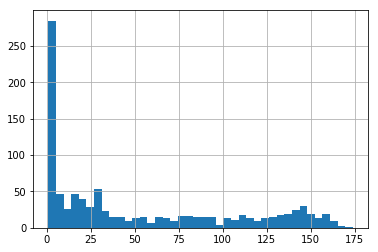

In [23]:
daily_2018.playerId.value_counts().hist(bins=40);

In [24]:
daily_2018.playerId.value_counts().describe()

count    992.000000
mean      52.762097
std       54.220667
min        1.000000
25%        4.000000
50%       28.000000
75%      100.250000
max      174.000000
Name: playerId, dtype: float64

In [25]:
under_25pct = []
for player in daily_2018.playerId.unique():
    if daily_2018[daily_2018['playerId'] == player].Date.count() < 41:
        under_25pct.append(player)

In [26]:
len(under_25pct)

571

In [27]:
for player in under_25pct:
    daily_2018 = daily_2018[daily_2018['playerId'] != player]

In [28]:
daily_2018.shape

(45741, 36)

In [29]:
daily_2018.head()

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
0,2018-03-29,Ozzie Albies,5,1,0,0,1,0,0.200000,16556,...,0.0,0.333333,0.0,0.0,0.25,0.5,0.25,0.0,0.75,0.25
1,2018-03-29,Maikel Franco,4,0,2,0,0,0,0.000000,12179,...,0.0,0.000000,0.0,0.0,0.50,0.0,0.50,0.0,1.00,0.00
2,2018-03-29,Evan Gattis,4,0,1,0,2,0,0.000000,11003,...,0.0,0.000000,0.0,0.0,0.00,1.0,0.00,0.0,1.00,0.00
3,2018-03-29,Yoan Moncada,6,1,0,0,2,0,0.166667,17232,...,0.0,0.000000,0.0,0.0,0.50,0.5,0.00,0.0,0.00,1.00
5,2018-03-29,Eddie Rosario,5,1,1,0,0,0,0.250000,12155,...,0.0,0.000000,0.5,0.0,0.75,0.0,0.25,0.0,0.50,0.50


In [30]:
daily_2018.playerId.nunique()

421

In [31]:
daily_2018.isnull().sum()

Date        0
Name        0
PA          0
H           0
BB          0
IBB         0
SO          0
HBP         0
AVG         0
playerId    0
BB%         0
K%          0
BB/K        0
OBP         0
SLG         0
OPS         0
ISO         0
BABIP       0
wRC         0
wRAA        0
wOBA        0
wRC+        0
GB/FB       0
LD%         0
GB%         0
FB%         0
IFFB%       0
HR/FB       0
IFH%        0
BUH%        0
Pull%       0
Cent%       0
Oppo%       0
Soft%       0
Med%        0
Hard%       0
dtype: int64

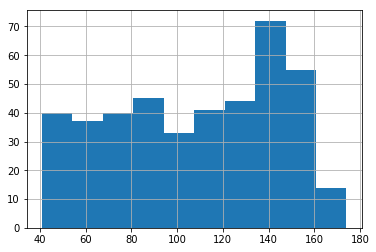

In [32]:
daily_2018.playerId.value_counts().hist()

In [33]:
custom_daily_2018 = pd.DataFrame()

In [34]:
pd.options.mode.chained_assignment = None  # default='warn'

In [35]:
for player in daily_2018.playerId.unique():
    player_df = daily_2018[daily_2018['playerId'] == player]
    player_df['Date'] = pd.to_datetime(player_df['Date'])
    player_df.set_index('Date', inplace=True)
    
    player_df['prev3_avg'] = player_df.H.rolling(3).sum() / player_df.PA.rolling(3).sum()
    player_df['prev5_avg'] = player_df.H.rolling(5).sum() / player_df.PA.rolling(5).sum()
    player_df['next_game_hit'] = (player_df.H.shift(-1) != 0)
    custom_daily_2018 = custom_daily_2018.append(player_df)

In [36]:
custom_daily_2018.shape

(45741, 38)

In [37]:
custom_daily_2018.head()

,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,BB%,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,prev3_avg,prev5_avg,next_game_hit
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,Ozzie Albies,5,1,0,0,1,0,0.200000,16556,0.0,...,0.0,0.25,0.5,0.25,0.0,0.75,0.25,NaN,NaN,False
2018-03-30,Ozzie Albies,5,0,0,0,0,0,0.000000,16556,0.0,...,0.0,0.60,0.0,0.40,0.4,0.40,0.20,NaN,NaN,True
2018-03-31,Ozzie Albies,6,1,0,0,1,0,0.166667,16556,0.0,...,0.0,0.60,0.2,0.20,0.2,0.80,0.00,0.125000,NaN,False
2018-04-02,Ozzie Albies,4,0,0,0,2,0,0.000000,16556,0.0,...,0.0,0.00,0.5,0.50,0.0,0.50,0.50,0.066667,NaN,True
2018-04-03,Ozzie Albies,5,3,0,0,1,0,0.600000,16556,0.0,...,0.0,0.50,0.5,0.00,0.0,0.50,0.50,0.266667,0.2,False


In [38]:
custom_daily_2018 = custom_daily_2018.sort_index()

In [39]:
custom_daily_2018.isnull().sum()

Name                0
PA                  0
H                   0
BB                  0
IBB                 0
SO                  0
HBP                 0
AVG                 0
playerId            0
BB%                 0
K%                  0
BB/K                0
OBP                 0
SLG                 0
OPS                 0
ISO                 0
BABIP               0
wRC                 0
wRAA                0
wOBA                0
wRC+                0
GB/FB               0
LD%                 0
GB%                 0
FB%                 0
IFFB%               0
HR/FB               0
IFH%                0
BUH%                0
Pull%               0
Cent%               0
Oppo%               0
Soft%               0
Med%                0
Hard%               0
prev3_avg         844
prev5_avg        1684
next_game_hit       0
dtype: int64

In [40]:
custom_daily_2018.dropna(inplace=True)

In [41]:
custom_daily_2018.head()

,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,BB%,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,prev3_avg,prev5_avg,next_game_hit
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,Josh Bell,4,1,1,0,2,0,0.333333,13145,0.25,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.391304,True
2018-04-01,Mikie Mahtook,3,1,0,0,1,0,0.333333,13130,0.00,...,0.0,0.5,0.5,0.0,0.0,1.0,0.0,0.222222,0.157895,False
2018-04-01,Gregory Polanco,4,0,0,0,2,0,0.000000,12907,0.00,...,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.083333,0.217391,True
2018-04-02,Mike Trout,4,0,1,0,1,0,0.000000,10155,0.25,...,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.357143,0.250000,True
2018-04-02,Stephen Piscotty,4,0,0,0,3,0,0.000000,13367,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.250000,0.190476,False


In [42]:
# custom_daily_2018.to_csv('../data/batters_2018_custom_daily_master.csv')

In [43]:
custom_daily_2018 = pd.read_csv('../data/batters_2018_custom_daily_master.csv')
custom_daily_2018['Date'] = pd.to_datetime(custom_daily_2018['Date'])
custom_daily_2018.set_index('Date', inplace=True)

In [44]:
# What index gives us our 80th percentile of rows?
custom_daily_2018.shape[0] * (4 / 5)

35244.0

In [45]:
# Set training data to be first 80% of rows.
train = custom_daily_2018.iloc[0:35244]

# Check shape to confirm we did this properly.
train.shape

(35244, 38)

In [46]:
# Set testing data to be last 20% of rows.
test = custom_daily_2018.iloc[35244:]

# Check shape to confirm we did this properly.
test.shape

(8811, 38)

In [47]:
X_train = train.drop(columns=['Name', 'playerId', 'next_game_hit'])
y_train = train['next_game_hit']

In [48]:
X_test = test.drop(columns=['Name', 'playerId', 'next_game_hit'])
y_test = test['next_game_hit']

In [49]:
logreg = LogisticRegression()
ss = StandardScaler()

In [50]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [51]:
logreg.fit(X_train_sc, y_train)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
print(f'Logreg predicted values: {logreg.predict(X_train_sc)}')

Logreg predicted values: [ True  True  True ...  True  True  True]


In [53]:
print(f'Logreg predicted probabilities: {logreg.predict_proba(X_train_sc)}')

Logreg predicted probabilities: [[0.40693023 0.59306977]
 [0.4496067  0.5503933 ]
 [0.4275005  0.5724995 ]
 ...
 [0.33763656 0.66236344]
 [0.3906473  0.6093527 ]
 [0.4012128  0.5987872 ]]


In [54]:
y_train.head()

Date
2018-04-01     True
2018-04-01    False
2018-04-01     True
2018-04-02     True
2018-04-02    False
Name: next_game_hit, dtype: bool

In [55]:
predictions = logreg.predict(X_test_sc)

In [56]:
def score_model(actuals, predictions):
    tn, fp, fn, tp = confusion_matrix(actuals, predictions).ravel()
    print(f'T Pos: {tp},   F Pos: {fp}')
    print(f'F Neg: {fn},   T Neg: {tn}')
    print(f'Accuracy: {(tp+tn)/len(predictions)}')
    print(f'Precision: {tp/(tp+fp)}')

In [57]:
score_model(y_test, predictions)

T Pos: 4687,   F Pos: 3232
F Neg: 404,   T Neg: 488
Accuracy: 0.5873340143003064
Precision: 0.5918676600580881


In [58]:
all_true = [True for x in range(len(y_test))]

In [59]:
score_model(y_test, all_true)

T Pos: 5091,   F Pos: 3720
F Neg: 0,   T Neg: 0
Accuracy: 0.5778004766768812
Precision: 0.5778004766768812


In [60]:
pred_proba = [i[1] for i in logreg.predict_proba(X_test_sc)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

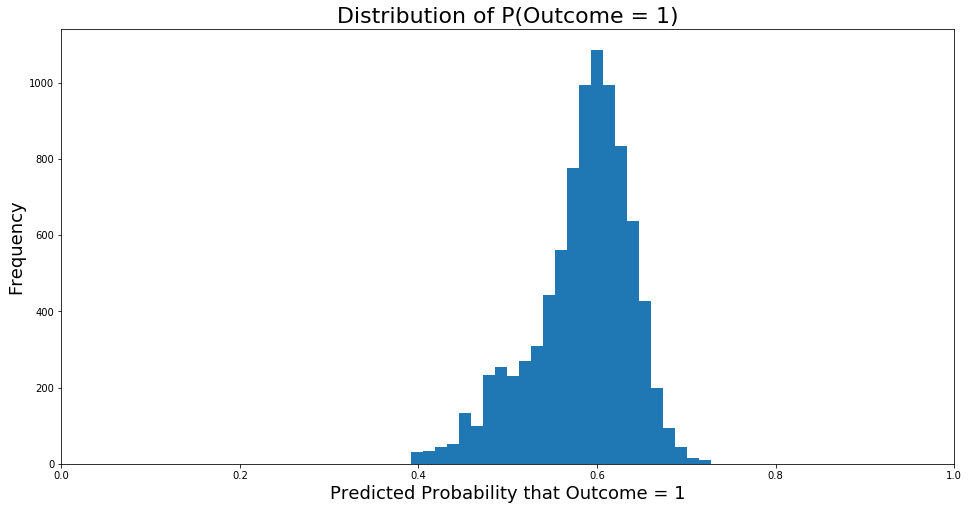

In [61]:
plt.figure(figsize = (16,8))

plt.hist(pred_df['pred_probs'], bins=25)

plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1);

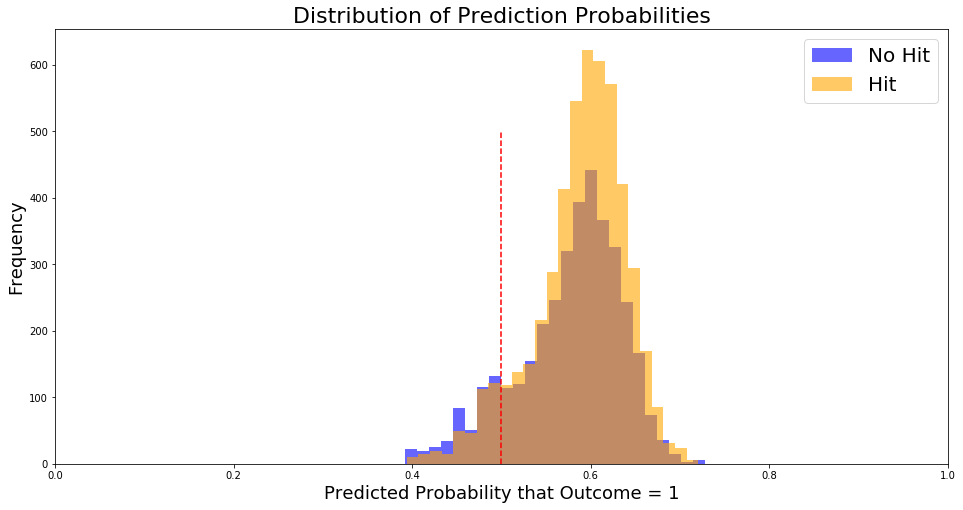

In [120]:
plt.figure(figsize = (16,8))

plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='No Hit')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Hit')

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 500,
           color='r',
           linestyle = '--')

plt.title('Distribution of Prediction Probabilities', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

In [ ]:
sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = airline)

In [63]:
rf = RandomForestClassifier(n_estimators=10, random_state=6)

In [64]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.5272102902650647

In [65]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [66]:
rf.score(X_train, y_train)

0.9704063102939507

In [67]:
rf.score(X_test, y_test)

0.5209397344228804

In [68]:
rf_preds = rf.predict(X_test)

In [69]:
score_model(y_test, rf_preds)

T Pos: 2961,   F Pos: 2091
F Neg: 2130,   T Neg: 1629
Accuracy: 0.5209397344228804
Precision: 0.586104513064133


In [70]:
rf = RandomForestClassifier(random_state=6)
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 6, 7],
    'max_features': [4, 5, 6],
    'min_samples_split': [2, 5, 9]
}

In [71]:
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 6, 7], 'max_features': [4, 5, 6], 'min_samples_split': [2, 5, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
gs.score(X_train, y_train)

0.6069118147769833

In [73]:
gs.score(X_test, y_test)

0.5873340143003064

In [74]:
gs_preds = gs.predict(X_test)

In [75]:
score_model(y_test, gs_preds)

T Pos: 4775,   F Pos: 3320
F Neg: 316,   T Neg: 400
Accuracy: 0.5873340143003064
Precision: 0.5898702903026559


In [116]:
gs_pred_proba = [i[1] for i in gs.predict_proba(X_test)]

gs_pred_df = pd.DataFrame({'true_values': y_test,
                           'pred_probs':gs_pred_proba})

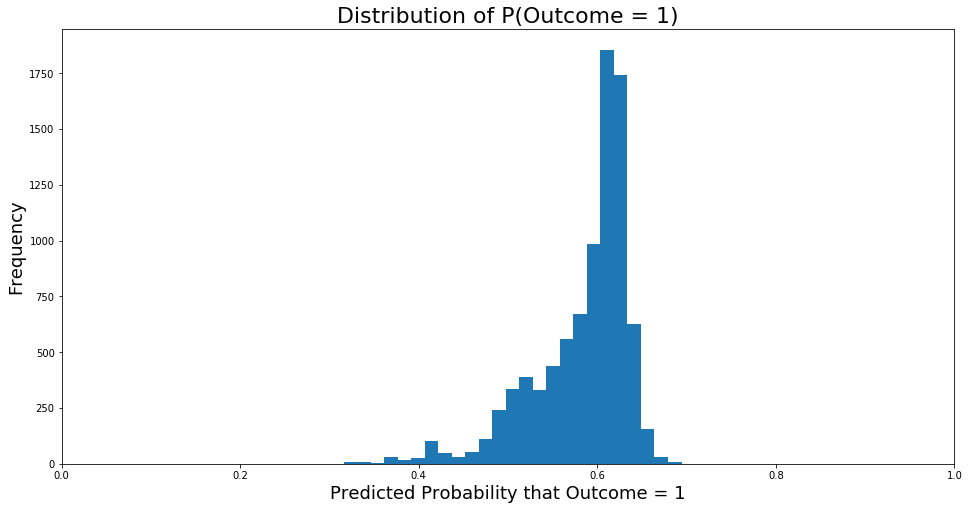

In [117]:
plt.figure(figsize = (16,8))

plt.hist(gs_pred_df['pred_probs'], bins=25)

plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1);

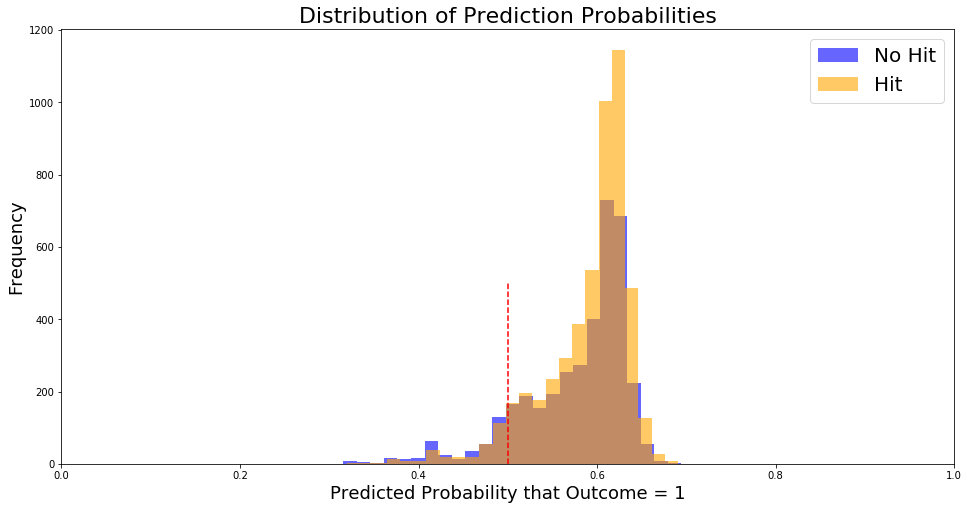

In [118]:
plt.figure(figsize = (16,8))

plt.hist(gs_pred_df[gs_pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='No Hit')
plt.hist(gs_pred_df[gs_pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Hit')

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 500,
           color='r',
           linestyle = '--')

plt.title('Distribution of Prediction Probabilities', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

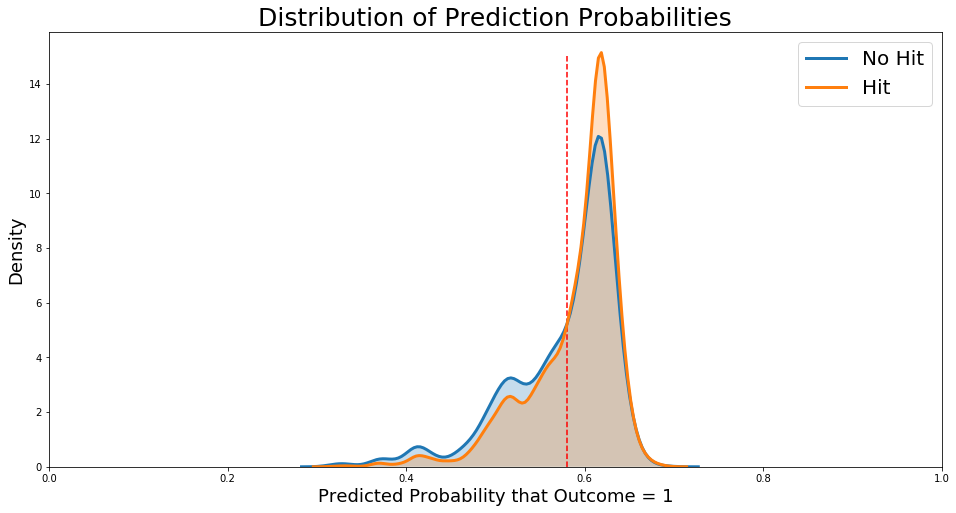

In [149]:
plt.figure(figsize = (16,8))

plt.vlines(x=0.58,
           ymin = 0,
           ymax = 15,
           color='r',
           linestyle = '--')

sns.distplot(gs_pred_df[gs_pred_df['true_values'] == 0]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='No Hit')
sns.distplot(gs_pred_df[gs_pred_df['true_values'] == 1]['pred_probs'],
             hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3},
             label='Hit')



plt.title('Distribution of Prediction Probabilities', fontsize=25)
plt.ylabel('Density', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

In [ ]:
gs_preds60 = [i[1] for i in gs.predict_proba(X_test)]

In [152]:
gs_preds60 = (gs.predict_proba(X_test)[:,1] >= 0.6).astype(bool)

In [139]:
len(gs_preds60)

8811

In [140]:
len(X_test)

8811

In [141]:
gs_preds

array([ True,  True,  True, ...,  True,  True,  True])

In [145]:
gs_preds60

array([False, False, False, ...,  True,  True, False])

In [153]:
score_model(y_test, gs_preds60)

T Pos: 2859,   F Pos: 1822
F Neg: 2232,   T Neg: 1898
Accuracy: 0.539893315174214
Precision: 0.6107669301431318


In [154]:
score_model(y_test, all_true)

T Pos: 5091,   F Pos: 3720
F Neg: 0,   T Neg: 0
Accuracy: 0.5778004766768812
Precision: 0.5778004766768812


In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA()

# Importing 2017 & 2016

In [81]:
daily_2017_standard = read_and_concat_csv('../data/batters_2017_daily/batters_2017_daily_standard', 6)
daily_2017_advanced = read_and_concat_csv('../data/batters_2017_daily/batters_2017_daily_advanced', 6)
daily_2017_battedballs = read_and_concat_csv('../data/batters_2017_daily/batters_2017_daily_battedballs', 6)

In [82]:
daily_2017_standard.shape

(51631, 24)

In [83]:
daily_2017_advanced.shape

(51631, 18)

In [84]:
daily_2017_battedballs.shape

(51631, 19)

In [85]:
daily_2017 = daily_2017_standard.merge(daily_2017_advanced)
daily_2017 = daily_2017.merge(daily_2017_battedballs)

In [86]:
# daily_2017.to_csv('../data/batters_2017_daily_master.csv', index=False)

In [87]:
daily_2017 = pd.read_csv('../data/batters_2017_daily_master.csv')

In [88]:
# custom_daily_2018['Date'] = pd.to_datetime(custom_daily_2018['Date'])
# custom_daily_2018.set_index('Date', inplace=True)

KeyError: 'Date'

In [89]:
daily_2017.drop(columns=drop_cols, inplace=True)

In [90]:
def remove_under25(df):
    under_25pct = []
    for player in df.playerId.unique():
        if df[df['playerId'] == player].Date.count() < 41:
            under_25pct.append(player)
    for player in under_25pct:
        df = df[df['playerId'] != player]
    return df

In [91]:
daily_2017.shape

(52071, 36)

In [92]:
daily_2017 = remove_under25(daily_2017)

In [93]:
daily_2017.shape

(45780, 36)

In [94]:
def add_rolling_avg(df):
    custom_df = pd.DataFrame()
    
    for player in df.playerId.unique():
        player_df = df[df['playerId'] == player]
        player_df['Date'] = pd.to_datetime(player_df['Date'])
        player_df.set_index('Date', inplace=True)
        
        player_df['prev3_avg'] = player_df.H.rolling(3).sum() / player_df.PA.rolling(3).sum()
        player_df['prev5_avg'] = player_df.H.rolling(5).sum() / player_df.PA.rolling(5).sum()
        player_df['next_game_hit'] = (player_df.H.shift(-1) != 0)
        
        custom_df = custom_df.append(player_df)
        
    return custom_df.sort_index()

In [95]:
custom_daily_2017 = add_rolling_avg(daily_2017)

In [96]:
daily_2017.shape

(45780, 36)

In [97]:
custom_daily_2017.shape

(45780, 38)

In [98]:
custom_daily_2017.head()

,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,BB%,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,prev3_avg,prev5_avg,next_game_hit
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-02,Chase Headley,4,3,0,0,1,0,0.750000,4720,0.0,...,1.0,0.0,0.0000,1.0000,0.3333,0.3333,0.3333,NaN,NaN,True
2017-04-02,Yadier Molina,5,2,2,1,0,0,0.666667,7007,0.4,...,0.0,0.0,0.3333,0.6667,0.3333,0.6667,0.0000,NaN,NaN,True
2017-04-02,Chris Owings,5,2,0,0,3,0,0.400000,10030,0.0,...,0.0,0.0,0.0000,1.0000,0.0000,0.5000,0.5000,NaN,NaN,True
2017-04-02,Jason Heyward,4,1,0,0,1,0,0.250000,4940,0.0,...,0.0,1.0,0.0000,0.0000,0.6667,0.3333,0.0000,NaN,NaN,True
2017-04-02,A.J. Pollock,5,3,0,0,0,0,0.600000,9256,0.0,...,0.0,0.2,0.4000,0.4000,0.2000,0.2000,0.6000,NaN,NaN,True


In [99]:
custom_daily_2017.next_game_hit.mean()

0.6022280471821756

In [100]:
daily_2016_standard = read_and_concat_csv('../data/batters_2016_daily/batters_2016_daily_standard', 6)
daily_2016_advanced = read_and_concat_csv('../data/batters_2016_daily/batters_2016_daily_advanced', 6)
daily_2016_battedballs = read_and_concat_csv('../data/batters_2016_daily/batters_2016_daily_battedballs', 6)

In [101]:
daily_2016_advanced.shape

(51572, 18)

In [102]:
daily_2016_battedballs.shape

(51572, 19)

In [103]:
daily_2016_standard.shape

(51572, 24)

In [104]:
daily_2016 = daily_2016_standard.merge(daily_2016_advanced)
daily_2016 = daily_2016.merge(daily_2016_battedballs)

In [ ]:
# daily_2016.to_csv('../data/batters_2016_daily_master.csv', index=False)

In [ ]:
daily_2016 = pd.read_csv('../data/batters_2016_daily_master.csv')

In [105]:
daily_2016.drop(columns=drop_cols, inplace=True)

In [106]:
daily_2016 = remove_under25(daily_2016)

In [107]:
custom_daily_2016 = add_rolling_avg(daily_2016)

In [108]:
custom_daily_2016.next_game_hit.mean()

0.6006794317479925

In [109]:
custom_daily_2018.next_game_hit.mean()

0.5884462603563727

In [110]:
all_seasons = pd.concat([custom_daily_2016, custom_daily_2017])

In [111]:
all_seasons = pd.concat([all_seasons, custom_daily_2018])

In [112]:
all_seasons.isnull().sum()

Name                0
PA                  0
H                   0
BB                  0
IBB                 0
SO                  0
HBP                 0
AVG                 0
playerId            0
BB%                 0
K%                  0
BB/K                0
OBP                 0
SLG                 0
OPS                 0
ISO                 0
BABIP               0
wRC                 0
wRAA                0
wOBA                0
wRC+                0
GB/FB               0
LD%                 0
GB%                 0
FB%                 0
IFFB%               0
HR/FB               0
IFH%                0
BUH%                0
Pull%               0
Cent%               0
Oppo%               0
Soft%               0
Med%                0
Hard%               0
prev3_avg        1683
prev5_avg        3364
next_game_hit       0
dtype: int64

In [113]:
all_seasons.dropna(inplace=True)

In [114]:
all_seasons.shape

(131802, 38)

In [115]:
# all_seasons.to_csv('../data/batters_all_seasons_master.csv', index=False)

In [ ]:
all_seasons = pd.read_csv('../data/batters_all_seasons_master.csv')

In [ ]:
all_seasons.shape[0] * (4/5)

In [ ]:
# Set training data to be first 80% of rows.
all_train = all_seasons.iloc[0:105441]

# Check shape to confirm we did this properly.
all_train.shape

In [ ]:
# Set training data to be first 80% of rows.
all_test = all_seasons.iloc[105441:]

# Check shape to confirm we did this properly.
all_test.shape

In [ ]:
all_X_train = all_train.drop(columns=['Name', 'playerId', 'next_game_hit'])
all_y_train = all_train['next_game_hit']

In [ ]:
all_X_test = all_test.drop(columns=['Name', 'playerId', 'next_game_hit'])
all_y_test = all_test['next_game_hit']

In [ ]:
all_y_test.mean()

In [ ]:
all_ss = StandardScaler()

In [ ]:
all_X_train_sc = all_ss.fit_transform(all_X_train)
all_X_test_sc = all_ss.transform(all_X_test)

In [ ]:
all_lr = LogisticRegression()

In [ ]:
all_lr.fit(all_X_train_sc, all_y_train)

In [ ]:
all_lr.score()

In [ ]:
all_preds = all_lr.predict(all_X_test_sc)

In [119]:
score_model(all_y_test, all_preds)

NameError: name 'all_y_test' is not defined

In [ ]:
all_y_test.mean()

In [ ]:
all_lr_pred_proba = [i[1] for i in all_lr.predict_proba(all_X_test_sc)]

all_lr_pred_df = pd.DataFrame({'true_values': all_y_test,
                           'pred_probs':all_lr_pred_proba})

In [ ]:
plt.figure(figsize = (16,8))

plt.hist(all_lr_pred_df['pred_probs'], bins=25)

plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1);

In [ ]:
plt.figure(figsize = (16,8))

plt.hist(all_lr_pred_df[all_lr_pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='No Hit')
plt.hist(all_lr_pred_df[all_lr_pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Hit')

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 2000,
           color='r',
           linestyle = '--')

plt.title('Distribution of Prediction Probabilities', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

# EDA

In [87]:
# !pip install pandas-profiling

  Running setup.py bdist_wheel for pandas-profiling ... done
  Stored in directory: /Users/BK/Library/Caches/pip/wheels/bf/c5/d0/7278ea92cf6195c9bef7d9b1b63767fc16dc490a2402287067
Successfully built pandas-profiling


In [93]:
profile = pandas_profiling.ProfileReport(custom_daily_2018)
profile.to_file(outputfile="output.html")

In [192]:
all_profile = pandas_profiling.ProfileReport(all_seasons)
all_profile.to_file(outputfile="all_output.html")

# Modeling for a single player

In [68]:
goldy_df = custom_daily_2018[custom_daily_2018['playerId'] == 9218]

In [69]:
goldy_df.shape

(154, 38)

In [70]:
# What index gives us our 80th percentile of rows?
goldy_df.shape[0] * (4 / 5)

123.2

In [71]:
# Set training data to be first 80% of rows.
goldy_train = goldy_df.iloc[0:123]

# Check shape to confirm we did this properly.
goldy_train.shape

(123, 38)

In [72]:
# Set testing data to be last 20% of rows.
goldy_test = goldy_df.iloc[123:]

# Check shape to confirm we did this properly.
goldy_test.shape

(31, 38)

In [73]:
goldy_X_train = goldy_train.drop(columns=['Name', 'playerId', 'next_game_hit'])
goldy_y_train = goldy_train['next_game_hit']

In [74]:
goldy_X_test = goldy_test.drop(columns=['Name', 'playerId', 'next_game_hit'])
goldy_y_test = goldy_test['next_game_hit']

In [75]:
goldy_logreg = LogisticRegression()
goldy_ss = StandardScaler()

In [76]:
gX_train_sc = goldy_ss.fit_transform(goldy_X_train)
gX_test_sc = goldy_ss.transform(goldy_X_test)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [80]:
goldy_logreg.fit(gX_train_sc, goldy_y_train)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
goldy_logreg.score(gX_train_sc, goldy_y_train)

0.7642276422764228

In [82]:
goldy_logreg.score(gX_test_sc, goldy_y_test)

0.6129032258064516

In [83]:
goldy_preds = goldy_logreg.predict(gX_test_sc)

In [86]:
score_model(goldy_y_test, goldy_preds)

T Pos: 18,   F Pos: 8
F Neg: 4,   T Neg: 1
Accuracy: 0.6129032258064516
Precision: 0.6923076923076923


In [84]:
goldy_all_true = [True for x in range(len(goldy_y_test))]

In [85]:
score_model(goldy_y_test, goldy_all_true)

T Pos: 22,   F Pos: 9
F Neg: 0,   T Neg: 0
Accuracy: 0.7096774193548387
Precision: 0.7096774193548387


___

# Players with > 162 rows

In [92]:
over_162 = []
for player in daily_2018.playerId.unique():
    if daily_2018[daily_2018['playerId'] == player].Date.count() > 162:
        over_162.append(player)

In [93]:
over_162

[4922, 5930, 11602, 11493, 4949, 2396, 5361, 10556, 11579, 16252]

In [105]:
daily_2018[daily_2018.playerId == 5930].head()

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
16,2018-03-29,Nick Markakis,5,1,0,0,1,0,0.200000,5930,...,0.5,0.5,0.0,0.0,0.5000,0.2500,0.2500,0.2500,0.2500,0.5000
342,2018-03-30,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.0,0.0,0.0,0.0000,0.5000,0.5000,0.2500,0.5000,0.2500
791,2018-03-31,Nick Markakis,6,2,3,0,1,0,0.666667,5930,...,0.0,0.0,0.0,0.0,0.0000,0.0000,1.0000,0.5000,0.5000,0.0000
1094,2018-04-02,Nick Markakis,4,0,0,0,1,0,0.000000,5930,...,0.0,0.0,0.0,0.0,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
1393,2018-04-03,Nick Markakis,5,3,0,0,0,0,0.600000,5930,...,0.0,0.0,0.0,0.0,0.4000,0.0000,0.6000,0.0000,0.8000,0.2000


In [106]:
daily_2018[daily_2018['playerId'] == 5930].Date.count()

174

In [107]:
daily_2018[daily_2018['playerId'] == 5930].PA.sum()

753

In [109]:
daily_2018[daily_2018['playerId'] == 5930]

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
16,2018-03-29,Nick Markakis,5,1,0,0,1,0,0.200000,5930,...,0.5,0.500000,0.0,0.0,0.5000,0.2500,0.2500,0.2500,0.2500,0.5000
342,2018-03-30,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.0000,0.5000,0.5000,0.2500,0.5000,0.2500
791,2018-03-31,Nick Markakis,6,2,3,0,1,0,0.666667,5930,...,0.0,0.000000,0.0,0.0,0.0000,0.0000,1.0000,0.5000,0.5000,0.0000
1094,2018-04-02,Nick Markakis,4,0,0,0,1,0,0.000000,5930,...,0.0,0.000000,0.0,0.0,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
1393,2018-04-03,Nick Markakis,5,3,0,0,0,0,0.600000,5930,...,0.0,0.000000,0.0,0.0,0.4000,0.0000,0.6000,0.0000,0.8000,0.2000
1607,2018-04-04,Nick Markakis,4,1,0,0,2,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.5000,0.0000,0.5000,0.5000,0.5000,0.0000
2179,2018-04-06,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.2500,0.2500,0.5000,0.2500,0.2500,0.5000
2324,2018-04-07,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.2500,0.5000,0.2500,0.0000,0.7500,0.2500
2780,2018-04-08,Nick Markakis,4,2,0,0,1,0,0.500000,5930,...,0.0,1.000000,0.0,0.0,0.3333,0.6667,0.0000,0.0000,0.6667,0.3333
2981,2018-04-09,Nick Markakis,3,1,0,0,1,0,0.333333,5930,...,0.0,0.000000,0.0,0.0,0.0000,1.0000,0.0000,0.0000,0.5000,0.5000


In [286]:
daily_2018[daily_2018['playerId'] == 5930].Name.value_counts()

Nick Markakis    174
Name: Name, dtype: int64

In [ ]:
daily_2018[daily_2018['playerId'] == 9218].PA.sum()

In [72]:
over_162

{False, True}

In [5]:
daily_2018_raw.shape

(53761, 25)